In [152]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [153]:
X = tf.range(1, 100, 1, tf.float32)
y = X + 10

In [154]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0015),
    metrics=["mae", "accuracy"]
)

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 27.5187 - mae: 27.5187 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 925us/step - loss: 12.4209 - mae: 12.4209 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 965us/step - loss: 4.1499 - mae: 4.1499 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 831us/step - loss: 4.3662 - mae: 4.3662 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 4.7795 - mae: 4.7795 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 4.7035 - mae: 4.7035 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 989us/step - loss: 4.1586 - mae: 4.1586 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 929us/step - loss: 4.1346 - mae: 4.1346 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - l

# Single layer/single unit model observations

1. One hidden layer with 1 unit produces **quickly** reducing training losses with right learning rate
2. learning rate being too high produces hovering (going up & down) losses remaing more or less ~same
3. adding "accuracy" in metrics array doesn't do anything

In [155]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse"]
)

model_1.fit(tf.expand_dims(X, axis=1), y, epochs=600)

Epoch 1/600
4/4 [==============================] - 0s 981us/step - loss: 4186.6548 - mse: 4186.6548
Epoch 2/600
4/4 [==============================] - 0s 788us/step - loss: 3494.7917 - mse: 3494.7917
Epoch 3/600
4/4 [==============================] - 0s 759us/step - loss: 2862.6143 - mse: 2862.6143
Epoch 4/600
4/4 [==============================] - 0s 792us/step - loss: 2336.7163 - mse: 2336.7163
Epoch 5/600
4/4 [==============================] - 0s 742us/step - loss: 1846.3276 - mse: 1846.3276
Epoch 6/600
4/4 [==============================] - 0s 753us/step - loss: 1428.0934 - mse: 1428.0934
Epoch 7/600
4/4 [==============================] - 0s 896us/step - loss: 1072.9491 - mse: 1072.9491
Epoch 8/600
4/4 [==============================] - 0s 781us/step - loss: 790.5875 - mse: 790.5875
Epoch 9/600
4/4 [==============================] - 0s 875us/step - loss: 556.4824 - mse: 556.4824
Epoch 10/600
4/4 [==============================] - 0s 781us/step - loss: 378.6328 - mse: 378.6328
Epoch

# Multiple units/2 layer model observations

1. learning rate to a lot extent affects quick or linearly decreasing of training losses
2. Adam optimizer is a LOT better than SGD
3. Adam seems to be more gradual and it can be clearly seen how adam steps
4. MSE loss is a lot better than MAE loss but requires A LOT of epochs

In [156]:
X_1 = tf.range(1, 100, 1, tf.float32)
y_1 = X_1 ** 2 + 1

In [157]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=["mae"]
)

model_2.fit(tf.expand_dims(X, axis=1), y, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 65.3187 - mae: 65.3187
Epoch 2/500
4/4 [==============================] - 0s 844us/step - loss: 62.9387 - mae: 62.9387
Epoch 3/500
4/4 [==============================] - 0s 778us/step - loss: 60.5259 - mae: 60.5259
Epoch 4/500
4/4 [==============================] - 0s 795us/step - loss: 58.2024 - mae: 58.2024
Epoch 5/500
4/4 [==============================] - 0s 790us/step - loss: 55.7804 - mae: 55.7804
Epoch 6/500
4/4 [==============================] - 0s 958us/step - loss: 53.3895 - mae: 53.3895
Epoch 7/500
4/4 [==============================] - 0s 770us/step - loss: 50.9644 - mae: 50.9644
Epoch 8/500
4/4 [==============================] - 0s 806us/step - loss: 48.5733 - mae: 48.5733
Epoch 9/500
4/4 [==============================] - 0s 855us/step - loss: 46.1315 - mae: 46.1315
Epoch 10/500
4/4 [==============================] - 0s 1000us/step - loss: 43.6930 - mae: 43.6930
Epoch 11/500
4/4 [======================

🌟 Tuning Adam for more layers, learning to get it just right in loss reduction and epochs to get the loss reduction time to minimize

> TODO: try making the X data in negatives too like -100 to 100 and seeing effectiveness of the models

In [175]:
X_test = tf.range(100, 200, 1, tf.float32)
y_test = X_test + 10

4/4 [==============================] - 0s 663us/step


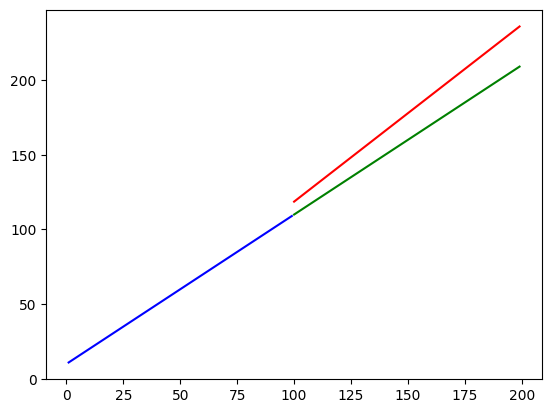

In [176]:
# model predictions

y_pred = model.predict(X_test)
y_pred = tf.squeeze(y_pred)

plt.plot(X, y, c="b")
plt.plot(X_test, y_test, c="g")
plt.plot(X_test, y_pred, c="r")

4/4 [==============================] - 0s 709us/step


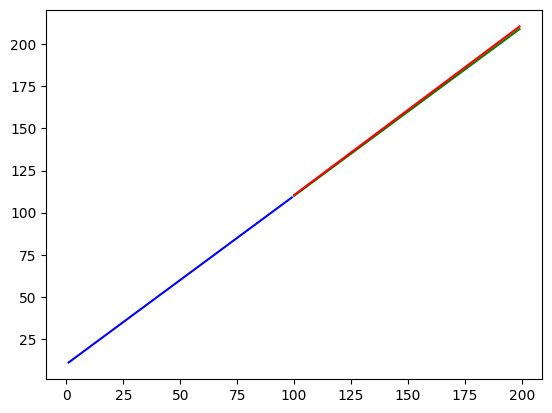

In [177]:
# model_1 predictions

y_pred_1 = model_1.predict(X_test)
y_pred_1 = tf.squeeze(y_pred_1)

plt.plot(X, y, c="b")
plt.plot(X_test, y_test, c="g")
plt.plot(X_test, y_pred_1, c="r")

4/4 [==============================] - 0s 572us/step


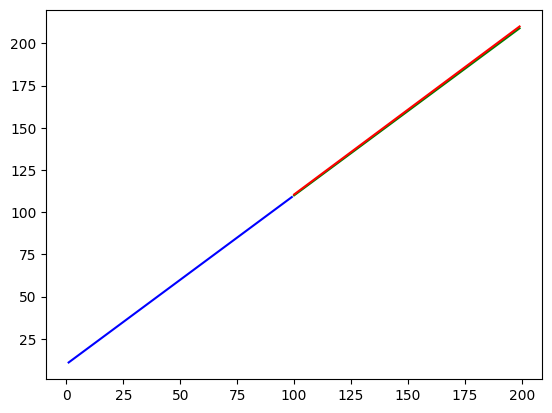

In [178]:
# model_2 predictions

y_pred_2 = model_2.predict(X_test)
y_pred_2 = tf.squeeze(y_pred_2)

plt.plot(X, y, c="b")
plt.plot(X_test, y_test, c="g")
plt.plot(X_test, y_pred_2, c="r")